In [2]:
import os
import numpy as np
import pandas as pd
import hickle

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


# Set working directory
DATA_DIR = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/'
# Set image directory which is off of GitHub
IMG_DIR_1 = 'C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/Cellavision_Trial_images/Test3_AltFebruary/'
IMG_DIR_2 = 'C:/Users/thoma/Pictures/HemePictures/'

WRONG_CSV = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/wrong_cell_csv/'



In [3]:
# http://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script

import sys
sys.path.append('C:/Anaconda/Lib/site-packages')

import cv2
import PIL

# 2843 TOTAL CELLS

In [4]:
# Set DATA directory
CSV_DIR = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/csv/'
path =r'C:\Users\thoma\Documents\00GitHub\rbc_cnn\csv' # use your path

def csv_to_dataFrame(path):
    
    # output csv
    #fout=open(outputFile,"a")
    i = 0 

    for root, dirs, files in os.walk(path):
        frame = pd.DataFrame()
        list_ = []
        for file_ in files:
            csv_path = os.path.join(root, file_)
            df = pd.read_csv(csv_path,index_col=0, header=0)
            list_.append(df)
        frame = pd.concat(list_)
    frame = frame.reset_index(drop=True)
    return frame



In [5]:
df = csv_to_dataFrame(CSV_DIR)

In [6]:
df['label'].value_counts()

NORMAL         1030
Schistocyte     894
Target cell     733
Echinocyte      348
Spherocyte      243
Overlap         231
Acanthocyte     185
Stomatocyte     110
Dacrocyte       102
Elliptocyte      97
Name: label, dtype: int64

In [6]:
z = df.ix[0]
z.x

1921

In [7]:
df = csv_to_dataFrame(CSV_DIR)
df = df.sort_values(by=['x'], ascending=[True])
df.reset_index(drop=True).head()

,annotator,image,label,pk,x,y
0,tommy,752300778HV_001.jpg,NORMAL,958,17,2783
1,tommy,Acanthocytes - 762601075HV_001.jpg,Acanthocyte,3949,22,535
2,tommy,752300778HV_001.jpg,NORMAL,978,22,2327
3,tommy,752300778HV_001.jpg,NORMAL,977,22,2395
4,rick,Schitos2.jpg,Schistocyte,2759,23,836


In [8]:
df.head()

,annotator,image,label,pk,x,y
2200,tommy,752300778HV_001.jpg,NORMAL,958,17,2783
100,tommy,Acanthocytes - 762601075HV_001.jpg,Acanthocyte,3949,22,535
2220,tommy,752300778HV_001.jpg,NORMAL,978,22,2327
2219,tommy,752300778HV_001.jpg,NORMAL,977,22,2395
792,rick,Schitos2.jpg,Schistocyte,2759,23,836


In [35]:
cell = df.ix[0]
cell.image

'Acanthocytes - 762601071HV_001.jpg'

In [55]:
def wrong_image(cell_ix, pk_value):

    cell_ix = df.ix[df['pk']==pk_value]
    img = df.get_value(cell_ix.index[0], 'image')
    path = "C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/00RbcCNN_Sln_Images/{}".format(img)

    im = cv2.imread(path)

    # im = cv2.imread(imgPath) 

    x = df.get_value(cell_ix.index[0], 'x')
    y = df.get_value(cell_ix.index[0], 'y')
    label = df.get_value(cell_ix.index[0], 'label')
    annot = df.get_value(cell_ix.index[0], 'annotator')

    new_x = x - 35
    new_y = y - 35
    new_w = 70
    new_h = 70
    crop_array = im[new_y:new_y+new_h, new_x:new_x+new_w]
    
    pic = Image.fromarray(crop_array)
    
    return pic 

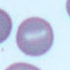

In [57]:
wrong_image(cell_ix, 695)

In [39]:
df.ix[1610]

annotator                   rick
image        752900362HV_001.jpg
label                 Spherocyte
pk                           354
x                           2364
y                           1933
Name: 1610, dtype: object

In [36]:
dup = np.array(df.duplicated(['pk']))
np.sum(dup)

0

In [139]:
len(df.iloc[0:10])

10

In [137]:
df['label'].value_counts()

NORMAL         714
Schistocyte    710
Target cell    705
Echinocyte     280
Acanthocyte    120
Spherocyte     116
Dacrocyte       71
Stomatocyte     68
Elliptocyte     59
Name: label, dtype: int64

In [126]:
import time
i = 0
index = 0
start = time.time()
     
x = cell.x

for s in range(len(df)):
    second_cell = df.ix[s]
    if second_cell.x in range(x-30, x+30):
        i += 1
        
stop = time.time()
print (stop - start)
print i

0.346999883652
70


In [127]:
import time
i = 0
index = 0
start = time.time()
for x in df['x']:
    index += 1
    if x in range(cell.x-30,cell.x+30):
        i += 1
        
stop = time.time()
print (stop - start)
print i
        

0.077999830246
70


In [6]:
test = df.ix[0]
test

annotator           tommy
image        Ecchinos.jpg
label          Echinocyte
pk                   2591
x                     254
y                    1167
Name: 0, dtype: object

In [11]:
df['annotator'].value_counts()

rick     1864
tommy     978
root        1
Name: annotator, dtype: int64

In [60]:
cell = df.ix[1]
cell

annotator           tommy
image        Ecchinos.jpg
label          Echinocyte
pk                   2592
x                     686
y                     978
Name: 1, dtype: object

In [36]:
if cell.x in range(df.ix[1].x-30, df.ix[1].x+30):
    print True
else:
    print False

False


In [67]:
l = []
l.append(cell)
l.append(test)
x = pd.DataFrame(l)
x

,annotator,image,label,pk,x,y
1,tommy,Ecchinos.jpg,Echinocyte,2592,686,978
0,tommy,Ecchinos.jpg,Echinocyte,2591,254,1167


In [40]:
"remove double labeled cells"
i = 0
for1 = 0
for2 = 0
missedByY = 0

for n in range(len(df)):
    

    cell = df.ix[n]
    for1 += 1

    # compare cell to at each "second_cell" in df 
    for s in range(len(df)):

        second_cell = df.ix[s]
        for2 += 1

        # if annotators are same; ignore
        if cell.annotator == second_cell.annotator:
            continue
        else:
            # if smear images are not same; ignore
            if cell.image != second_cell.image:
                continue

            # if x is within range of other cell
            elif cell.x in range(second_cell.x-30, second_cell.x+30):
                # and y is within range of other cell
                # same annotator, same image, similar coordinates
                if cell.y in range(second_cell.y-30, second_cell.y+30):
                    i += 1
                    print "{} overlapping cells".format(i)
                    cIx = n
                    sIx = s
                    print n, s
                    break
                else:
                    continue
            else:
                continue
 

1 overlapping cells
9 127
2 overlapping cells
12 142
3 overlapping cells
16 130
4 overlapping cells
17 129
5 overlapping cells
23 133


KeyboardInterrupt: 

In [36]:
# Alter the original csv file so you can get the new XY
# Start by loading in the new csv to dataframe

# csvFile = DATA_DIR + 'dataset.csv'
# classes = pd.read_csv(csvFile, index_col=0, parse_dates=True)
# read in cell labels from Cell Label Tool 
classes = pd.read_csv(CSV_DIR + 'dataset.csv', index_col=0, parse_dates=True)

#alt_february_files = pd.read_csv(DATA_DIR + 'alt_february_files.csv', index_col=0, parse_dates=True)
classes.head()

,annotator,image,label,pk,x,y
0,rick,752602451HV_001.jpg,NORMAL,11,1602,664
1,rick,752602451HV_001.jpg,NORMAL,12,1642,597
2,rick,752602451HV_001.jpg,NORMAL,13,1664,652
3,rick,752602451HV_001.jpg,NORMAL,15,1551,728
4,rick,752602451HV_001.jpg,NORMAL,16,1551,679


In [4]:
# get rid of reject cells
classes = classes[classes.label != 'Reject']
classes = classes[classes.label != 'Abnormal']
len(classes)

2218

In [6]:
# counts the number of cells in each calss
classes['label'].value_counts()

NORMAL         714
Target cell    702
Schistocyte    253
Echinocyte     185
Spherocyte     100
Dacrocyte       71
Stomatocyte     68
Acanthocyte     67
Elliptocyte     58
Name: label, dtype: int64

In [19]:
len(classes)

2218

In [17]:
cell = classes.ix[264]
im = cv2.imread("C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/00RbcCNN_Sln_Images/752900362HV_001.jpg")
cell

annotator                   rick
image        752900362HV_001.jpg
label                Target cell
pk                           320
x                            672
y                           1652
Name: 264, dtype: object

In [18]:
cell.y

1652

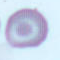

In [19]:
cell = classes.ix[264]
im = cv2.imread("C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/00RbcCNN_Sln_Images/752900362HV_001.jpg")
cell

new_x = cell.x - 30
new_y = cell.y - 30
new_w = 60
new_h = 60

croppedCell = im[new_y:new_y+new_h, new_x:new_x+new_w]
pic = Image.fromarray(croppedCell)
pic

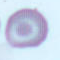

In [20]:
new_x = cell.x - 30
new_y = cell.y - 30
new_w = 60
new_h = 60

croppedCell2 = im[new_y:new_y+new_h, new_x:new_x+new_w]
pic = Image.fromarray(croppedCell2)
pic

In [11]:
croppedCell.shape

(60L, 60L, 3L)

In [55]:
# gets byte array from smear image using xywh coordinates 
def getData(ind, dataframe, im):
    # im = cv2.imread(IMG_DIR + dataframe.image[ind])
    df = dataframe.ix[ind]
    label = df.label
    
    new_x = df.x - 30
    new_y = df.y - 30
    new_w = 60
    new_h = 60

    croppedCell = im[new_y:new_y+new_h, new_x:new_x+new_w]

    if croppedCell.shape == (60, 60, 3):
        return croppedCell, label
    

In [22]:
# get array data from smear with label
# n = total number of cells 

def CreateLabelImageArrays(dataframe):
    
    # chunking counter
    i = 0
    
    # byte array
    X = []
    # label array
    Y = []
    # not sure
    IDs = []
    
    # iterates over image column of dataframe
    for n in dataframe.image.iteritems():
        
        # this is the entire index object
        index_obj = dataframe.ix[n[0]]
        
        # n[0] = index
        index = n[0]

        # get smear image array      
        im = cv2.imread(IMG_DIR + dataframe.image[index])

        try:
            # pass index, dataframe, and image array to function
            x, y = getData(index, dataframe, im)
        except Exception, e:
            #type, value, tb = sys.exc_info()
            #traceback.print_exc()
            print e
            continue

        X.append(x)
        Y.append(y)
        IDs.append(n)
        
        i += 1
        
        if i > 999:
            
            # individual cell byte arrays    
            X = np.array(X)

            # individual cell labels
            Y = np.array(Y)

            # individual cell associated smear files
            IDs = np.array(IDs)

            # create dictionary for arrays
            d = {}
            d['X'] = totalByteArray
            d['y'] = totalLabelArray
            
            # hickle counter
            hickleCount = 0
            
            # (X, Y) -- ((N,3,w,h), label)
            hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April{}.hkl'.format(hickleCount),'w'))
            
            hickleCount += 1
            i = 0

In [83]:
# Get image arrays for test3 dataset
#test3_image_arrays = CreateLabelImageArrays(classes)

In [ ]:
pic = Image.fromarray(test3_image_arrays[0][4])
pic

In [23]:
test = {}
hickleCount = 8
for x in range(hickleCount):
    test["hk{}".format(x)] = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April{}.hkl'.format(x))

In [24]:
# join cell byte arrays 
totalByteArray = np.concatenate((test['hk0']['X'], test['hk1']['X'], test['hk2']['X'], 
                                 test['hk3']['X'], test['hk4']['X'], test['hk5']['X'], 
                                 test['hk6']['X'], test['hk7']['X']))

# join cell label arrays
totalLabelArray = np.concatenate((test['hk0']['y'], test['hk1']['y'], test['hk2']['y'], 
                                 test['hk3']['y'], test['hk4']['y'], test['hk5']['y'], 
                                 test['hk6']['y'], test['hk7']['y']))


In [26]:
# create dictionary for arrays
d = {}
d['X'] = totalByteArray
d['y'] = totalLabelArray

In [41]:
len(totalByteArray)

18060

In [27]:
# (X, Y) -- ((N,3,w,h), label)
hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/TotalHickle.hkl','w'))

In [46]:
hk_overlap = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April_overlap.hkl')

In [47]:
hk_overlap['y']

149

In [1]:
pic = Image.fromarray(hk['X'][333])
pic


NameError: name 'Image' is not defined

In [153]:
df2 = df[df.image == '752200524HV_001.jpg']

In [12]:
x = np.array(df['x'])
y = np.array(df['y'])
i = np.array(df['image'])

In [15]:
dx = x[:, np.newaxis] - x
dy = y[:, np.newaxis] - y
di = (i[:, np.newaxis] != i)*1e9

In [16]:
dx[np.diag_indices(len(dx))] = 1e9
dy[np.diag_indices(len(dy))] = 1e9
di[np.diag_indices(len(di))] = 1e9

In [17]:
dx = np.abs(dx)
dy = np.abs(dy)

# sum absolute value of x and y
d = dx + dy + di

In [18]:
b = d.min(0)

In [19]:
(b<30).mean()

0.10481885332395358

In [20]:
(b<30).nonzero()

(array([   9,   12,   16,   17,   23,   35,   38,   50,   51,   52,   55,
          56,   58,   64,   67,   68,   69,   77,   79,   85,   86,   94,
          95,  104,  110,  116,  125,  126,  127,  129,  130,  131,  132,
         133,  136,  138,  139,  140,  142,  144,  145,  146,  147,  148,
         150,  152,  153,  154,  155,  156,  157,  159,  161,  162,  163,
         164,  165,  166,  167,  174,  176,  177,  179,  180,  181,  182,
         183,  184,  185,  186,  187,  188,  190,  191,  192,  194,  195,
         196,  197,  198,  199,  200,  201,  202,  203,  205,  207,  208,
         209,  210,  211,  212,  213,  214,  215,  216,  218,  219,  220,
         221,  222,  223,  224,  225,  228,  229,  230,  231,  232,  233,
         236,  237,  239,  240,  242,  243,  244,  245,  246,  247,  248,
         250,  251,  254,  256,  257,  258,  259,  260,  262,  263,  264,
         265,  266,  267,  269,  270,  273,  274,  275,  278,  279,  280,
         281,  284,  285,  286,  287, 

In [24]:
# create array with zeros of length b 
exclude = np.zeros(len(b))

# iterate through index of length b 
for i in range(len(b)):
    # if True/anything present at exclude[i]; skip
    if exclude[i]:
        continue
    if b[i] < 30:
        # add True to index position of exclude if d[i] < 30     
        exclude[(d[i] < 30).nonzero()] = True

# create overlap frame
df_overlap = df[exclude == True]
df_overlap = df_overlap.reset_index(drop=True)

# create non_overlap frame
df_nonoverlap = df[exclude == False]
df_nonoverlap = df_nonoverlap.reset_index(drop=True)

# create rick frame
df_r = df[df.annotator == 'rick']
df_r = df_r.reset_index(drop=True)

# create tommy frame
df_t = df[df.annotator == 'tommy']
df_t = df_t.reset_index(drop=True)

In [59]:
hk = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April_non_overlap.hkl')
len(hk['X'])

2680